In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
from ssapp.data.AntennaDatasetLoaders import ReflectorCutDatasetComplex, ReflectorCutDataset
from torch.utils.data.dataloader import DataLoader
import torch

CUTS = 2
dataset_complex = ReflectorCutDatasetComplex(cuts = CUTS, mag_phase_transform=True)
dataset_simple = ReflectorCutDataset(cuts = CUTS)

complex_dataloader = DataLoader(dataset_complex)
dataloaderSimple = DataLoader(dataset_simple)







parameters tensor([[0.0100, 0.4000, 0.0000]])
Field Cuts: tensor([[[-3.9886e-02, -1.1229e-01, -2.5134e-16, -8.8881e-17],
         [-3.5864e-02, -1.1596e-01, -1.9664e-16, -6.0601e-17],
         [-3.1714e-02, -1.1944e-01, -2.4459e-16, -9.6585e-17],
         ...,
         [-3.1398e-02, -1.2380e-01,  1.0151e-16, -2.0273e-16],
         [-3.5598e-02, -1.2043e-01,  1.3699e-16, -2.8258e-16],
         [-3.9672e-02, -1.1689e-01,  5.6395e-17, -3.1269e-16]]])
tensor([[[1.1917e-01, 2.6659e-16],
         [1.2138e-01, 2.0577e-16],
         [1.2358e-01, 2.6297e-16],
         ...,
         [1.2772e-01, 2.2672e-16],
         [1.2558e-01, 3.1403e-16],
         [1.2344e-01, 3.1774e-16]]])
tensor([[[-1.9121, -2.8017],
         [-1.8708, -2.8426],
         [-1.8303, -2.7655],
         ...,
         [-1.8192, -1.1066],
         [-1.8582, -1.1194],
         [-1.8980, -1.3924]]])
parameters tensor([[0.0100, 0.4889, 0.0000]])
Field Cuts: tensor([[[-3.9886e-02, -1.1229e-01, -2.5134e-16, -8.8881e-17],
         [-

In [64]:
for parameters, mag, phase in iter(complex_dataloader):
    print('parameters',parameters)
    print(mag)
    print(phase)

parameters tensor([[0.0100, 0.4000, 0.0000]])
tensor([[[1.1917e-01, 2.6659e-16],
         [1.2138e-01, 2.0577e-16],
         [1.2358e-01, 2.6297e-16],
         ...,
         [1.2772e-01, 2.2672e-16],
         [1.2558e-01, 3.1403e-16],
         [1.2344e-01, 3.1774e-16]]])
tensor([[[-1.9121, -2.8017],
         [-1.8708, -2.8426],
         [-1.8303, -2.7655],
         ...,
         [-1.8192, -1.1066],
         [-1.8582, -1.1194],
         [-1.8980, -1.3924]]])
parameters tensor([[0.0100, 0.4889, 0.0000]])
tensor([[[1.0825e-01, 8.7676e-17],
         [1.1088e-01, 7.6471e-17],
         [1.1352e-01, 8.6348e-17],
         ...,
         [1.1430e-01, 2.9054e-16],
         [1.1170e-01, 2.6907e-16],
         [1.0911e-01, 3.1895e-16]]])
tensor([[[-0.7625, -2.7613],
         [-0.7191, -2.1574],
         [-0.6771, -1.7617],
         ...,
         [-0.6795, -2.6267],
         [-0.7214, -2.6651],
         [-0.7647, -2.6629]]])


In [89]:
from ssapp.data.AntennaDatasetLoaders import get_raw_dataset_path
import numpy as np

cut_dir, param_dir = get_raw_dataset_path('PatchAntennaDataset1')
print(cut_dir)

file_to_open = cut_dir / '0.cut'
param_file = param_dir / 'lookup.log'
cuts = 1 

antenna_parameters = np.genfromtxt(param_file, skip_header=1,skip_footer=343-cuts,dtype = np.float32)
antenna_parameters = antenna_parameters.reshape(cuts,4)[:,1:4]
print(antenna_parameters)


V_INI, V_INC, V_NUM, C, ICOMP, ICUT, NCOMP = np.genfromtxt(file_to_open, max_rows=1, skip_header=1)
V_NUM = int(V_NUM)

phi_cut = np.genfromtxt(file_to_open, skip_header=2, max_rows= V_NUM).reshape(1,V_NUM,1,4)
for i in range(1,3):
    phi_cut=np.append(phi_cut, np.genfromtxt(file_to_open, skip_header=2+i*(V_NUM+2), max_rows= V_NUM).reshape(1,V_NUM,1,4),axis=2)

print(phi_cut.shape)


c:\Users\Niels\Documents\GitHub\Supervised-Machine-Learning-for-Space-Antenna-Performance-Prediction\data\raw\PatchAntennaDataset1\cut_files
[[-2.   5.   2.9]]
(1, 361, 3, 4)


In [130]:
from ssapp.data.AntennaDatasetLoaders import PatchAntennaDatasetComplex

data = PatchAntennaDatasetComplex()

patch_dataloader = DataLoader(data)



print(data.field_cut.shape)


from matplotlib import pyplot as plt



torch.Size([343, 361, 3, 2])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 432x288 with 0 Axes>

In [231]:
from ssapp.models.NeuralNetworkModels.Autoencoders import PatchAntenna1ConvAutoEncoder
from ssapp.data.AntennaDatasetLoaders import PatchAntennaDatasetComplex,PatchAntennaDataset
data = PatchAntennaDataset(cuts = 20)
patch_dataloader = DataLoader(data)

model = PatchAntenna1ConvAutoEncoder()

params,test_input = next(iter(patch_dataloader))
print(test_input.shape)

out = model.encode(test_input.float())
print(out.shape)
out = model.decode(out)
print(out.shape)



torch.Size([1, 361, 3, 4])
Encoder conv1Shape torch.Size([1, 8, 3, 182])
Encoder Conv2Shape torch.Size([1, 16, 3, 91])
torch.Size([10])
torch.Size([1, 8, 7, 181])


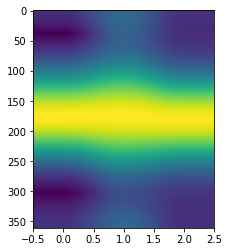

In [205]:
params,test_input = next(iter(patch_dataloader))
plt.figure()
plt.imshow(torch.abs(test_input[0,:,:,1:2]),aspect=1/100)